# Exploratory Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection and loading dataset

In [2]:
corona=pd.read_csv('corona.csv')

In [3]:
corona.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
corona.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [5]:
corona.shape

(23688, 5)

In [6]:
corona.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [7]:
corona.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [8]:
corona['Confirmed'].max()    

1680913

In [9]:
corona['Confirmed'].min()  

0

In [10]:
corona['Confirmed'].mean()  

7969.367527862209

In [11]:
corona['Date']=pd.to_datetime(corona['Date'])

In [12]:
type(corona['Date'])

pandas.core.series.Series

In [13]:
corona.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

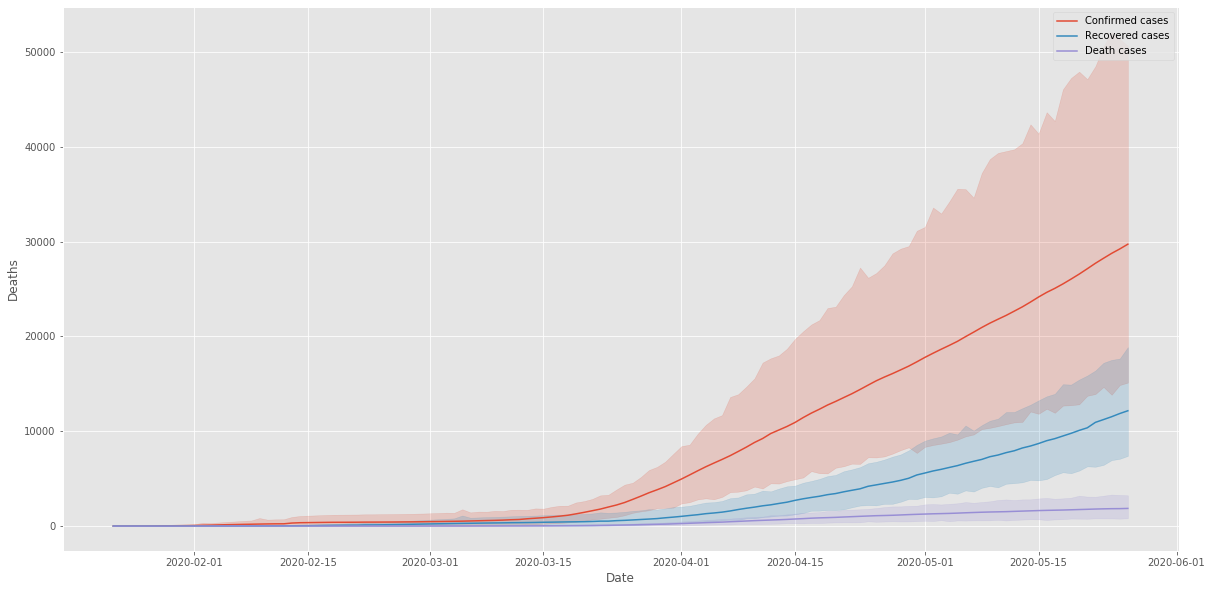

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.lineplot(x=corona['Date'],y=corona['Confirmed'],markers='*',label='Confirmed cases')
sns.lineplot(x=corona['Date'],y=corona['Recovered'],markers='s',label='Recovered cases')
sns.lineplot(x=corona['Date'],y=corona['Deaths'],markers='h',label='Death cases')
plt.legend()
plt.show()

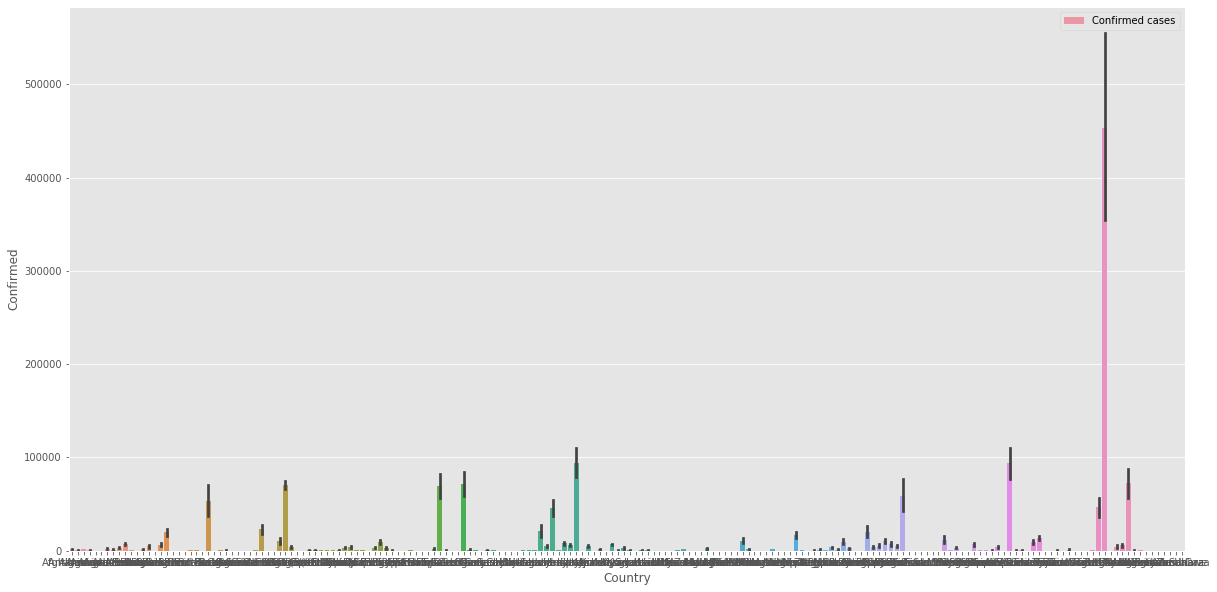

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.barplot(x=corona['Country'],y=corona['Confirmed'],label='Confirmed cases')
plt.legend()
plt.show()

In [16]:
## Grouping the data by datawise for different types of cases
datewise=corona.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [17]:
datewise

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-05-22,5210817,2056643,338160
2020-05-23,5310362,2112185,342097
2020-05-24,5407613,2168563,345059


In [18]:
print('Basic Information')
print('Total no of Confirmed cases',datewise['Confirmed'].iloc[-1])
print('Total no of Recovered cases',datewise['Recovered'].iloc[-1])
print('Total no of Deaths cases',datewise['Deaths'].iloc[-1])
print('Total no of Active cases',datewise['Confirmed'].iloc[-1]-datewise['Recovered'].iloc[-1]-datewise['Deaths'].iloc[-1])
print('Total no of Closed cases',datewise['Recovered'].iloc[-1]+datewise['Deaths'].iloc[-1])

Basic Information
Total no of Confirmed cases 5589626
Total no of Recovered cases 2286956
Total no of Deaths cases 350453
Total no of Active cases 2952217
Total no of Closed cases 2637409


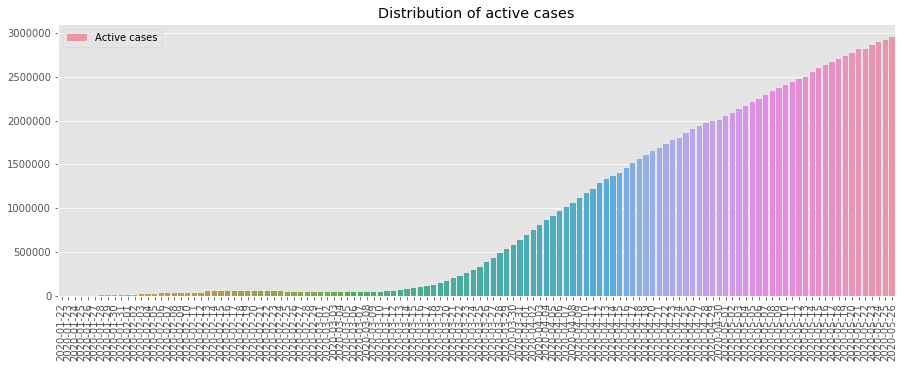

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Confirmed']-datewise['Recovered']-datewise['Deaths'],label='Active cases')
plt.title('Distribution of active cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

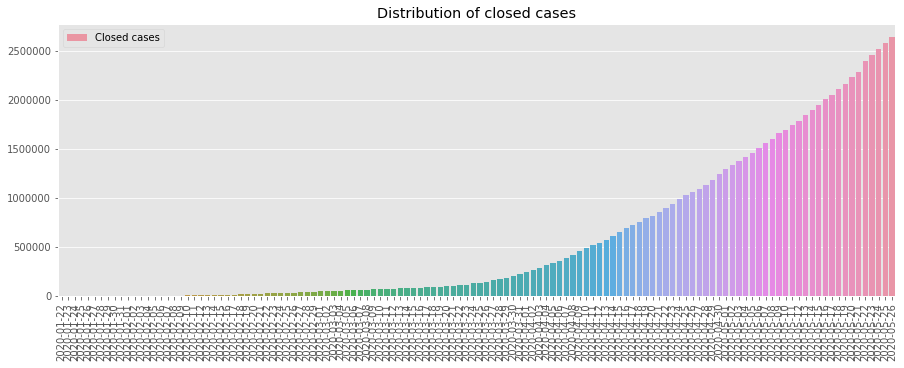

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Recovered']+ datewise['Deaths'],label='Closed cases')
plt.title('Distribution of closed cases')
plt.xticks(rotation=90)
plt.legend()
plt.show()

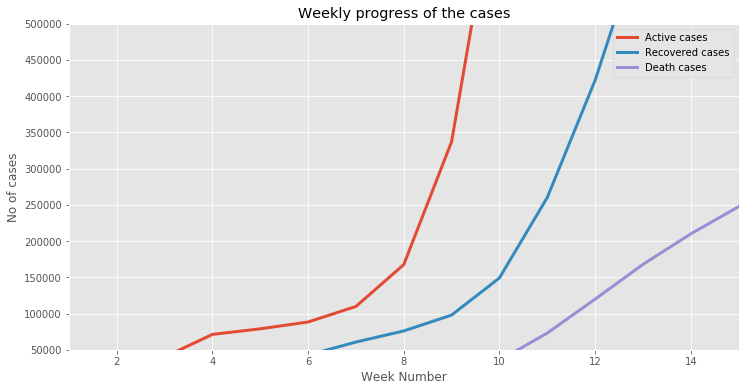

In [21]:
from datetime import date
datewise['Week of year']=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise['Week of year'].unique()):
    weekwise_confirmed.append(datewise[datewise['Week of year']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['Week of year']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['Week of year']==i]['Deaths'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(12,6))
plt.plot(week_num,weekwise_confirmed,linewidth=3,label='Active cases')
plt.plot(week_num,weekwise_recovered,linewidth=3, label='Recovered cases')
plt.plot(week_num,weekwise_deaths,linewidth=3,label='Death cases')
plt.legend()
plt.xlabel('Week Number')
plt.xlim(1,15)
plt.ylim(50000,500000)
plt.ylabel('No of cases')
plt.title('Weekly progress of the cases')
plt.show()

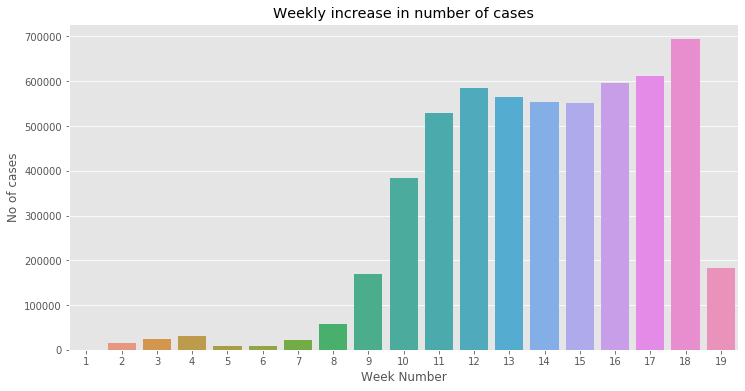

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff())
plt.xlabel('Week Number')
plt.ylabel('No of cases')
plt.title('Weekly increase in number of cases')
plt.show()

In [23]:
print('Average no. of confirmed cases', np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print('Average no. of recovered cases', np.round(datewise['Recovered'].diff().fillna(0).mean()))
print('Average no. of death cases', np.round(datewise['Deaths'].diff().fillna(0).mean()))

Average no. of confirmed cases 44358.0
Average no. of recovered cases 18150.0
Average no. of death cases 2781.0


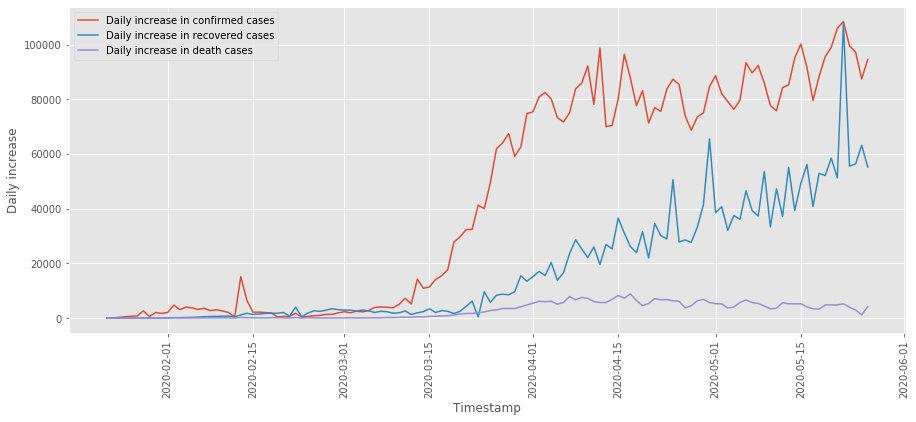

In [24]:
plt.figure(figsize=(15,6))
plt.plot(datewise['Confirmed'].diff().fillna(0),label='Daily increase in confirmed cases')
plt.plot(datewise['Recovered'].diff().fillna(0),label='Daily increase in recovered cases')
plt.plot(datewise['Deaths'].diff().fillna(0),label='Daily increase in death cases')
plt.xlabel('Timestamp')
plt.ylabel('Daily increase')
plt.xticks(rotation=90)
plt.legend()
plt.show() 

In [25]:
##Countrywise Analysis
##Calculating the motality rate Analysis
countrywise=corona[corona['Date']==corona['Date'].max()].groupby(corona['Country']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)
countrywise.head()

,Confirmed,Recovered,Deaths
Country,,,
US,1680913,384902,98913
Brazil,391222,158593,24512
Russia,362342,131129,3807
United Kingdom,266599,1161,37130
Spain,236259,150376,27117


In [26]:
countrywise['Mortality']=(countrywise['Deaths']/countrywise['Confirmed'])*100
countrywise['Recovery']=(countrywise['Deaths']/countrywise['Recovered'])*100

In [27]:
print("Mortality rate for the countries",countrywise['Mortality'].head())

Mortality rate for the countries Country
US                 5.884481
Brazil             6.265496
Russia             1.050665
United Kingdom    13.927284
Spain             11.477658
Name: Mortality, dtype: float64


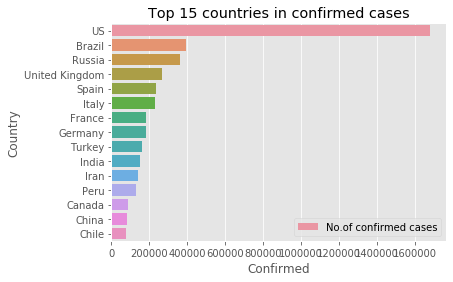

In [28]:
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
sns.barplot(top_15_confirmed['Confirmed'],y=top_15_confirmed.index,label='No.of confirmed cases')
plt.title('Top 15 countries in confirmed cases')
plt.legend()
plt.show()

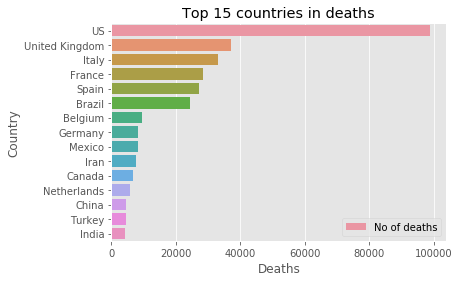

In [29]:
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(top_15_deaths['Deaths'],y=top_15_deaths.index,label='No of deaths')
plt.title('Top 15 countries in deaths')
plt.legend()
plt.show()

Conclusions:
1. United States is the worst effected country with Corona Virus both in confirmed cases and deaths.
2. Brazil is the second country in deaths but the deaths are much in United Kingdom
3. As per this data India is in the fifteenth position in deaths and 10 th position in the confirmed cases 

In [30]:
## Analysis on India for the dataset
india_data=corona[corona['Country']=='India']
datewise_india=india_data.groupby('Date').agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print('Total no of Active cases',datewise_india['Confirmed'].iloc[-1]-datewise_india['Recovered'].iloc[-1]-datewise_india['Deaths'].iloc[-1])
print('Total no of Closed cases',datewise_india['Recovered'].iloc[-1]+datewise_india['Deaths'].iloc[-1])

Confirmed    150793
Recovered     64277
Deaths         4344
Name: 2020-05-26 00:00:00, dtype: int64
Total no of Active cases 82172
Total no of Closed cases 68621


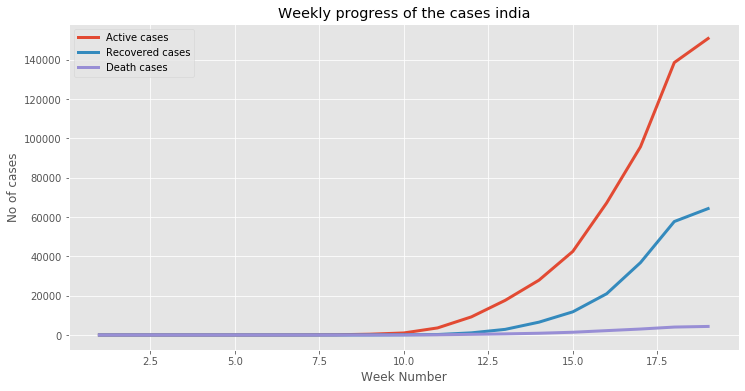

In [31]:
from datetime import date
datewise_india['Week of year']=datewise_india.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise_india['Week of year'].unique()):
    weekwise_confirmed.append(datewise_india[datewise_india['Week of year']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise_india[datewise_india['Week of year']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise_india[datewise_india['Week of year']==i]['Deaths'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(12,6))
plt.plot(week_num,weekwise_confirmed,linewidth=3,label='Active cases')
plt.plot(week_num,weekwise_recovered,linewidth=3, label='Recovered cases')
plt.plot(week_num,weekwise_deaths,linewidth=3,label='Death cases')
plt.legend()
plt.xlabel('Week Number')
plt.ylabel('No of cases')
plt.title('Weekly progress of the cases india')
plt.show()

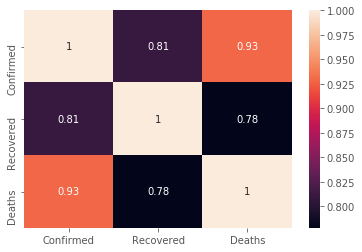

In [32]:
sns.heatmap(corona.corr(),annot=True)

# Model Building

In [33]:
corona.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [34]:
corona=corona.drop('Country',axis=1)

In [35]:
corona.head()

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0
1,2020-01-22,0,0,0
2,2020-01-22,0,0,0
3,2020-01-22,0,0,0
4,2020-01-22,0,0,0


In [36]:
datewise['Days']=datewise.index-datewise.index[0]
datewise['Days']=datewise['Days'].dt.days
train=datewise.iloc[:int(datewise.shape[0]*0.95)]
test=datewise.iloc[:int(datewise.shape[0]*0.95)]
model_scores=[]

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
lr=LinearRegression(normalize=True)
svm=SVR(C=1,kernel='poly',degree=5,epsilon=0.001)
lr.fit(np.array(train['Days']).reshape(-1,1),np.array(train['Confirmed']).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
svm.fit(np.array(train['Days']).reshape(-1,1),np.array(train['Confirmed']).reshape(-1,1))

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
prediction_Linear_regression=lr.predict(np.array(test['Days']).reshape(-1,1))
prediction_SVR=svm.predict(np.array(test['Days']).reshape(-1,1))

In [40]:
prediction_Linear_regression

array([[-1118770.7092437 ],
       [-1078206.72727532],
       [-1037642.74530694],
       [ -997078.76333856],
       [ -956514.78137017],
       [ -915950.79940179],
       [ -875386.81743341],
       [ -834822.83546503],
       [ -794258.85349665],
       [ -753694.87152827],
       [ -713130.88955989],
       [ -672566.90759151],
       [ -632002.92562313],
       [ -591438.94365475],
       [ -550874.96168637],
       [ -510310.97971799],
       [ -469746.99774961],
       [ -429183.01578123],
       [ -388619.03381285],
       [ -348055.05184447],
       [ -307491.06987609],
       [ -266927.08790771],
       [ -226363.10593932],
       [ -185799.12397094],
       [ -145235.14200256],
       [ -104671.16003418],
       [  -64107.1780658 ],
       [  -23543.19609742],
       [   17020.78587096],
       [   57584.76783934],
       [   98148.74980772],
       [  138712.7317761 ],
       [  179276.71374448],
       [  219840.69571286],
       [  260404.67768124],
       [  300968.659

In [41]:
prediction_SVR

array([ 164775.31641756,  164775.31661311,  164775.32267522,
        164775.36393663,  164775.51666253,  164775.92751672,
        164776.83702781,  164778.60305549,  164781.72425665,
        164786.86355166,  164794.87159056,  164806.81021923,
        164823.97594563,  164847.92340604,  164880.48883118,
        164923.81351251,  164980.36726837,  165052.97191023,
        165144.82470886,  165259.52186059,  165401.08195347,
        165573.96943349,  165783.1180708 ,  166033.95442591,
        166332.42131588,  166685.00128057,  167098.74004881,
        167581.27000462,  168140.83365342,  168786.30708823,
        169527.22345589,  170373.79642325,  171336.9436434 ,
        172428.31022186,  173660.29218279,  175046.05993521,
        176599.58173918,  178335.64717204,  180269.89059461,
        182418.81461739,  184799.81356673,  187431.19695114,
        190332.21292739,  193523.07176676,  197024.96932128,
        200860.11048987,  205051.73268462,  209624.12929694,
        214602.67316379,

In [42]:
from datetime import timedelta
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lr.predict(np.array(datewise['Days'].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise['Days'].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","LR","SVR"])
model_predictions.head()

,Dates,LR,SVR
0,2020-05-27,3992291,6375101
1,2020-05-28,4032855,6625486
2,2020-05-29,4073419,6883882
3,2020-05-30,4113983,7150480
4,2020-05-31,4154547,7425474


In [43]:
corona.tail()

,Date,Confirmed,Recovered,Deaths
23683,2020-05-26,429,365,3
23684,2020-05-26,9,6,1
23685,2020-05-26,249,10,49
23686,2020-05-26,920,336,7
23687,2020-05-26,56,25,4


# Time Series Analysis

In [44]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
model_test=datewise.iloc[:int(datewise.shape[0]*0.85)]

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [46]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
ypred=model_test.copy()
ypred["Holt"]=holt.forecast(len(model_test))

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [47]:
from datetime import timedelta
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(model_test)+i))[-1])
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()
    

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-05-27,3992291,6375101,12884723
1,2020-05-28,4032855,6625486,12968414
2,2020-05-29,4073419,6883882,13052104
3,2020-05-30,4113983,7150480,13135794
4,2020-05-31,4154547,7425474,13219485


In [48]:
holt=Holt(np.asarray(model_train["Deaths"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
ypred=model_test.copy()
ypred["Holt"]=holt.forecast(len(model_test))

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [49]:
from datetime import timedelta
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(model_test)+i))[-1])
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()
    

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-05-27,3992291,6375101,862026
1,2020-05-28,4032855,6625486,867513
2,2020-05-29,4073419,6883882,873000
3,2020-05-30,4113983,7150480,878486
4,2020-05-31,4154547,7425474,883973
